In [126]:
from __future__ import print_function
__author__='rbc'
import os
import numpy as np
import pylab as pl
import json
import matplotlib.pyplot as mat
%pylab inline
from scipy.optimize import curve_fit, minimize

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [127]:
mymean=100

In [128]:
distr = {}

Creating an array of 100 random numbers, which will later be plugged in as the sample size for the 100 samples of each of six distributions

In [129]:
mysize=1000/(np.array(range(1,100)+[10]))
print (mysize, mysize.shape)

[1000  500  333  250  200  166  142  125  111  100   90   83   76   71   66
   62   58   55   52   50   47   45   43   41   40   38   37   35   34   33
   32   31   30   29   28   27   27   26   25   25   24   23   23   22   22
   21   21   20   20   20   19   19   18   18   18   17   17   17   16   16
   16   16   15   15   15   15   14   14   14   14   14   13   13   13   13
   13   12   12   12   12   12   12   12   11   11   11   11   11   11   11
   10   10   10   10   10   10   10   10   10  100] (100,)


Selecting 6 different distributions, which all draw on the mean

In [130]:
distr['chisq'] = {}
for n in mysize:
    distr['chisq'][n] = np.random.chisquare(mymean,n)

distr['normal'] = {}
for n in mysize:
    distr['normal'][n] = np.random.normal(mymean,50,n)
    
distr['poisson'] = {}
for n in mysize:
    distr['poisson'][n] = np.random.poisson(mymean,n)
    
distr['binom'] = {}
for n in mysize:
    distr['binom'][n] = np.random.binomial(200,.5,n)
    
distr['wald'] = {}
for n in mysize:
    distr['wald'][n] = np.random.wald(mymean,n,100)
    
distr['loc'] = {}
for n in mysize:
    distr['loc'][n] = np.random.logistic(mymean,100,n)

Plotting the mean and sample size for each of the 100 samples in each of six distributions. The six plots do demonstrate the expected behavior - as sample size increases, sample means ten to approach the population mean (100).

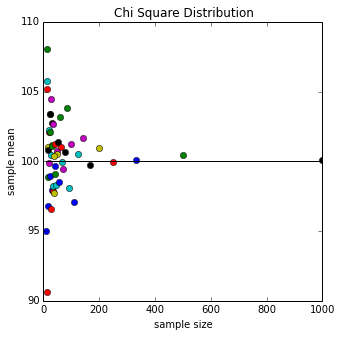

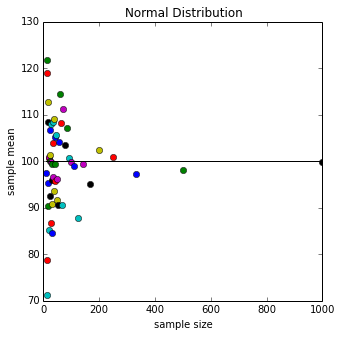

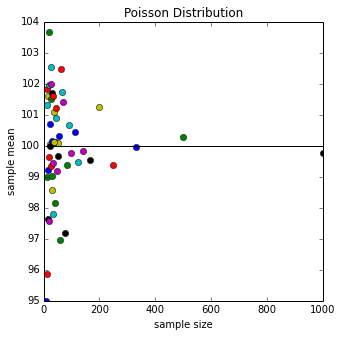

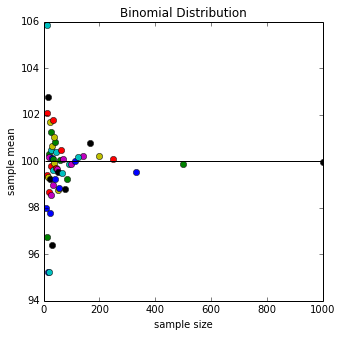

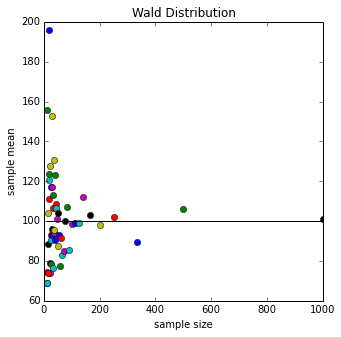

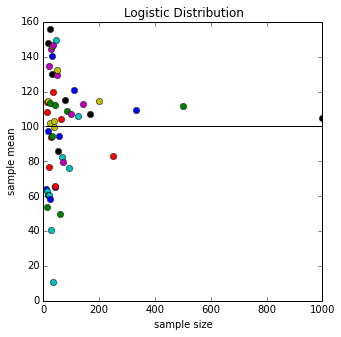

In [131]:
means = {}
means['chisq'] = {}
means['normal'] = {}
means['poisson'] = {}
means['binom'] = {}
means['wald'] = {}
means['loc'] = {}

fig_mu_N = pl.figure(figsize=(5,5))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in distr['chisq'].iterkeys():
    pl.title('Chi Square Distribution')
    means['chisq'][nn] = distr['chisq'][nn].mean()
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')
    
fig_mu_N = pl.figure(figsize=(5,5))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in distr['normal'].iterkeys():
    pl.title('Normal Distribution')
    means['normal'][nn] = distr['normal'][nn].mean()
    axchisq_mu_n.plot(nn, means['normal'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')
    
fig_mu_N = pl.figure(figsize=(5,5))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in distr['poisson'].iterkeys():
    pl.title('Poisson Distribution')
    means['poisson'][nn] = distr['poisson'][nn].mean()
    axchisq_mu_n.plot(nn, means['poisson'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')
    
fig_mu_N = pl.figure(figsize=(5,5))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in distr['binom'].iterkeys():
    pl.title('Binomial Distribution')
    means['binom'][nn] = distr['binom'][nn].mean()
    axchisq_mu_n.plot(nn, means['binom'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')
    
fig_mu_N = pl.figure(figsize=(5,5))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in distr['wald'].iterkeys():
    pl.title('Wald Distribution')
    means['wald'][nn] = distr['wald'][nn].mean()
    axchisq_mu_n.plot(nn, means['wald'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')

fig_mu_N = pl.figure(figsize=(5,5))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in distr['loc'].iterkeys():
    pl.title('Logistic Distribution')
    means['loc'][nn] = distr['loc'][nn].mean()
    axchisq_mu_n.plot(nn, means['loc'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')


Finally, creating a histogram that combines the means from all 600 samples. This demonstrates the Central Limit Theorem: when a sufficiently large number of samples are drawn (in this case, 600), the distribution of sample means approaches a normal distribution, even if the underlying distributions from which the samples are drawn are not all normal.

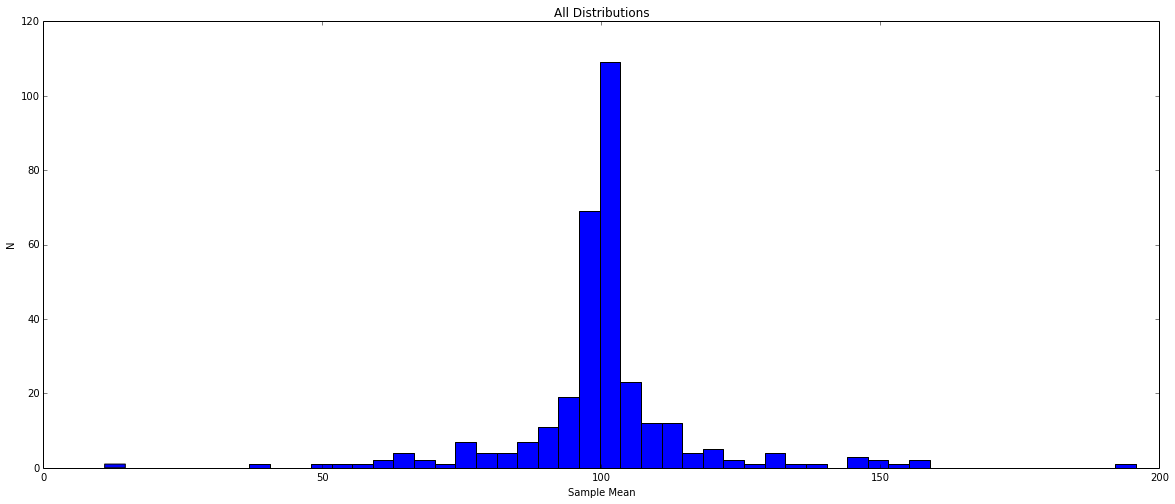

In [132]:
allmeans=[]
for n in means['chisq']:
    allmeans.append(means['chisq'][n])
for n in means['normal']:
    allmeans.append(means['normal'][n])
for n in means['poisson']:
    allmeans.append(means['poisson'][n])
for n in means['binom']:
    allmeans.append(means['binom'][n])
for n in means ['wald']:
    allmeans.append(means['wald'][n])
for n in means ['loc']:
    allmeans.append(means['loc'][n])
pl.figure(figsize=(20,8))
pl.hist(allmeans,bins=50)
pl.xlabel('Sample Mean')
pl.ylabel('N')
pl.title('All Distributions')

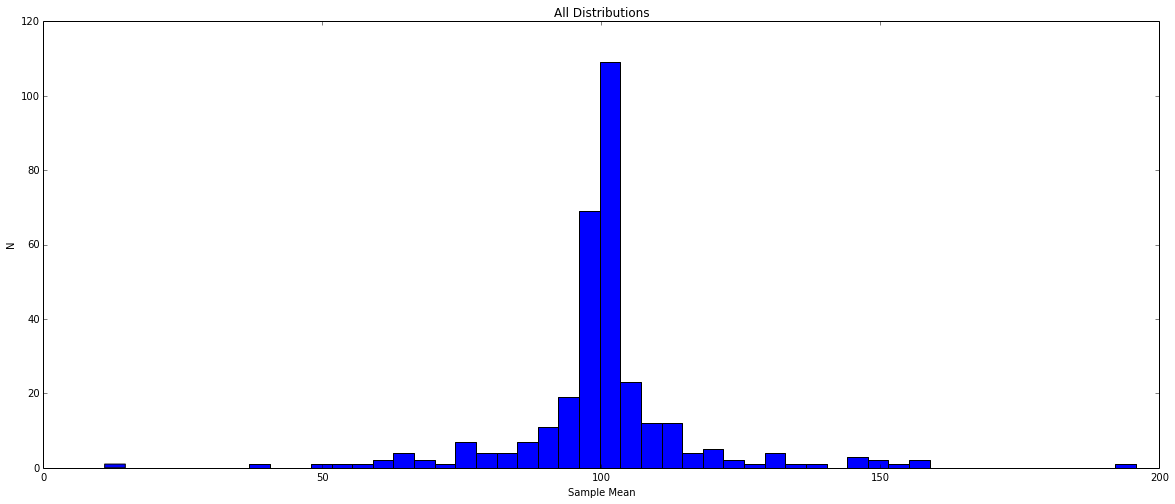

In [138]:
allmeans=[]
for n in means['chisq']:
    allmeans.append(means['chisq'][n])
for n in means['normal']:
    allmeans.append(means['normal'][n])
for n in means['poisson']:
    allmeans.append(means['poisson'][n])
for n in means['binom']:
    allmeans.append(means['binom'][n])
for n in means ['wald']:
    allmeans.append(means['wald'][n])
for n in means ['loc']:
    allmeans.append(means['loc'][n])
pl.figure(figsize=(20,8))
pl.hist(allmeans,bins=50)
pl.xlabel('Sample Mean')
pl.ylabel('N')
pl.title('All Distributions')